In [ ]:
1

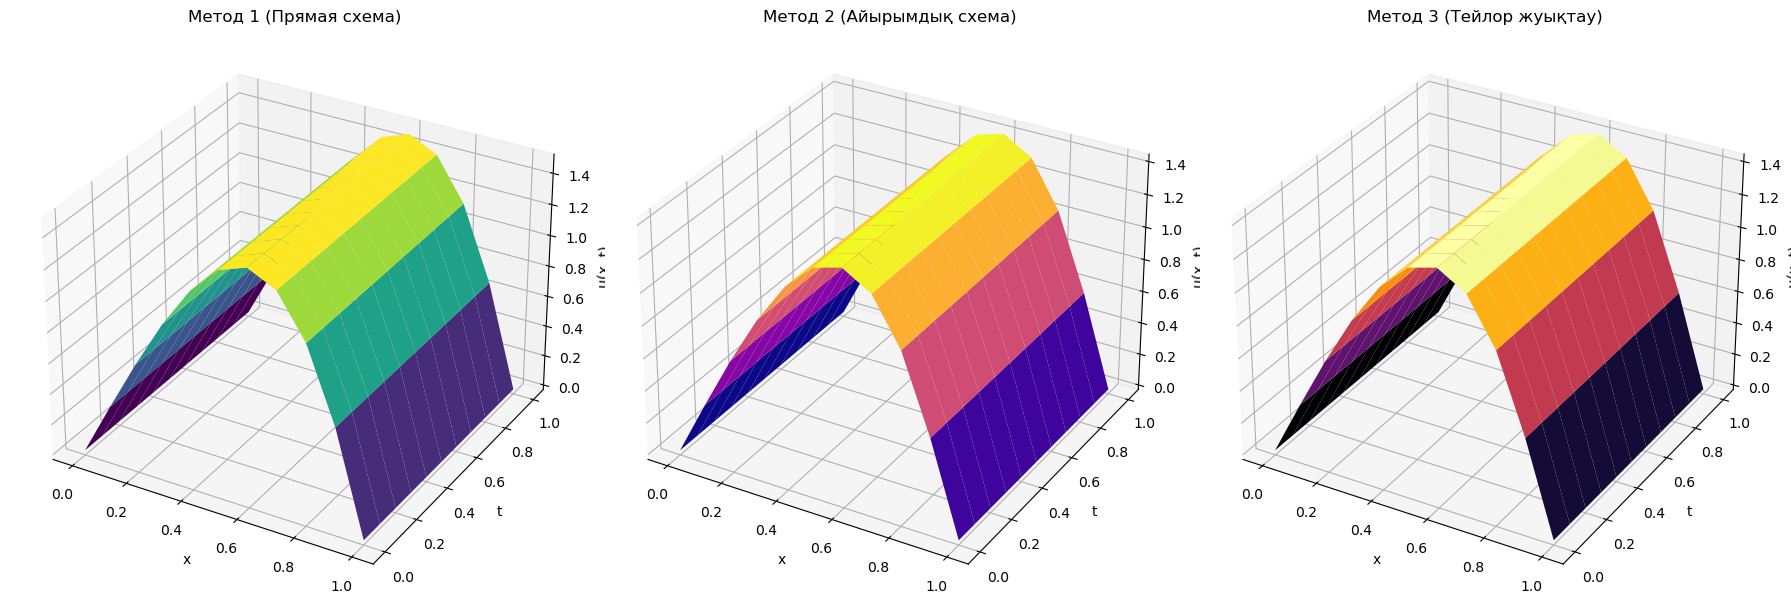

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметр n = 2 үшін a мәнін анықтаймыз
a = 1.1 + 0.1 * 2  # n = 2 болғанда a = 1.3
x_values = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
h = 0.1

# Функция для вычисления значений f(x)
def calculate_f_values(a):
    f_values = (a * x_values**2 + 1.1) * np.sin(np.pi * x_values)
    return f_values

# Функция для вычисления u_i значений для трех методов
def calculate_u_values(a):
    f_values = calculate_f_values(a)

    # Метод 1: Прямая схема (u_{i1} = u_{i0})
    u_method1 = f_values.copy()

    # Метод 2: Айырымдық схема (u_i = (f_{i+1} + f_{i-1}) / 2)
    u_method2 = np.zeros_like(f_values)
    u_method2[0] = f_values[0]
    u_method2[-1] = f_values[-1]
    for i in range(1, len(f_values) - 1):
        u_method2[i] = (f_values[i + 1] + f_values[i - 1]) / 2

    # Метод 3: Тейлор жуықтау (u_i = f_i + 0.5 * h^2 * f''(x_i))
    f_double_prime = np.zeros(len(f_values))
    for i in range(1, len(f_values) - 1):
        f_double_prime[i] = (f_values[i + 1] - 2 * f_values[i] + f_values[i - 1]) / h**2
    u_method3 = f_values + 0.5 * h**2 * f_double_prime

    return u_method1, u_method2, u_method3

# 3D графикті құру функциясы
def plot_3d_results(a, u_method1, u_method2, u_method3):
    X, T = np.meshgrid(x_values, np.arange(0, len(x_values) * h, h))

    fig = plt.figure(figsize=(18, 6))

    # Метод 1 графигі
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, T, np.tile(u_method1, (len(x_values), 1)), cmap='viridis')
    ax1.set_title("Метод 1 (Прямая схема)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("t")
    ax1.set_zlabel("u(x, t)")

    # Метод 2 графигі
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, T, np.tile(u_method2, (len(x_values), 1)), cmap='plasma')
    ax2.set_title("Метод 2 (Айырымдық схема)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("t")
    ax2.set_zlabel("u(x, t)")

    # Метод 3 графигі
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, T, np.tile(u_method3, (len(x_values), 1)), cmap='inferno')
    ax3.set_title("Метод 3 (Тейлор жуықтау)")
    ax3.set_xlabel("x")
    ax3.set_ylabel("t")
    ax3.set_zlabel("u(x, t)")

    plt.tight_layout()
    plt.show()

# n = 2 үшін есептеу және 3D графикті көрсету
u_method1, u_method2, u_method3 = calculate_u_values(a)
plot_3d_results(a, u_method1, u_method2, u_method3)


In [ ]:
2

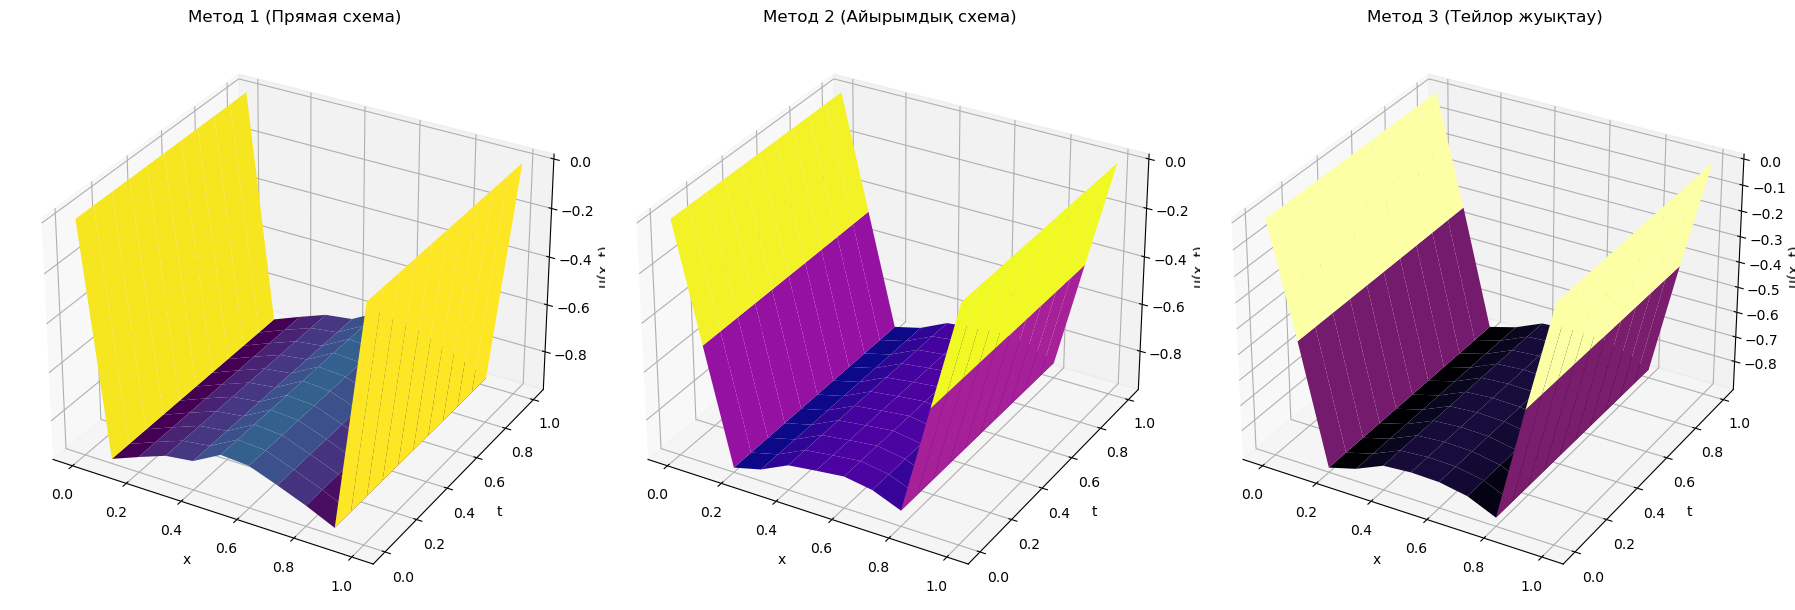

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметр n = 2 үшін a мәнін анықтаймыз
a = 0.95 + 0.025 * 2  # n = 2 болғанда a = 1.0
x_values = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
h = 0.1

# Базалық f(x) және \(\Phi(x)\) мәндері
f_base = np.array([0, 0.0145, 0.0511, 0.0921, 0.114, 0.1825, 0.1902, 0.1481, 0.1028, 0.0502, 0])
phi_values = np.array([0, 0.0420, 0.0500, 0.0510, 0.0440, 0.0380, 0.0220, 0.0210, 0.0200, 0.0190, 0])

# Функция для вычисления u_i значений для трех методов
def calculate_u_values(a):
    f_values = f_base.copy()
    f_values[1:-1] -= a  # \(a\) мәнін кестелік деректерден азайту

    # Метод 1: Прямая схема (u_{i1} = u_{i0})
    u_method1 = f_values + phi_values

    # Метод 2: Айырымдық схема (u_i = (f_{i+1} + f_{i-1}) / 2)
    u_method2 = np.zeros_like(f_values)
    u_method2[0] = f_values[0]
    u_method2[-1] = f_values[-1]
    for i in range(1, len(f_values) - 1):
        u_method2[i] = (f_values[i + 1] + f_values[i - 1]) / 2

    # Метод 3: Тейлор жуықтау (u_i = f_i + \Phi_i + 0.5 * h^2 * f''(x_i))
    f_double_prime = np.zeros(len(f_values))
    for i in range(1, len(f_values) - 1):
        f_double_prime[i] = (f_values[i + 1] - 2 * f_values[i] + f_values[i - 1]) / h**2
    u_method3 = f_values + phi_values + 0.5 * h**2 * f_double_prime

    return u_method1, u_method2, u_method3

# 3D графикті құру функциясы
def plot_3d_results(a, u_method1, u_method2, u_method3):
    X, T = np.meshgrid(x_values, np.arange(0, len(x_values) * h, h))

    fig = plt.figure(figsize=(18, 6))

    # Метод 1 графигі
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X, T, np.tile(u_method1, (len(x_values), 1)), cmap='viridis')
    ax1.set_title("Метод 1 (Прямая схема)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("t")
    ax1.set_zlabel("u(x, t)")

    # Метод 2 графигі
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, T, np.tile(u_method2, (len(x_values), 1)), cmap='plasma')
    ax2.set_title("Метод 2 (Айырымдық схема)")
    ax2.set_xlabel("x")
    ax2.set_ylabel("t")
    ax2.set_zlabel("u(x, t)")

    # Метод 3 графигі
    ax3 = fig.add_subplot(133, projection='3d')
    ax3.plot_surface(X, T, np.tile(u_method3, (len(x_values), 1)), cmap='inferno')
    ax3.set_title("Метод 3 (Тейлор жуықтау)")
    ax3.set_xlabel("x")
    ax3.set_ylabel("t")
    ax3.set_zlabel("u(x, t)")

    plt.tight_layout()
    plt.show()

# n = 2 үшін есептеу және 3D графикті көрсету
u_method1, u_method2, u_method3 = calculate_u_values(a)
plot_3d_results(a, u_method1, u_method2, u_method3)


In [ ]:
3

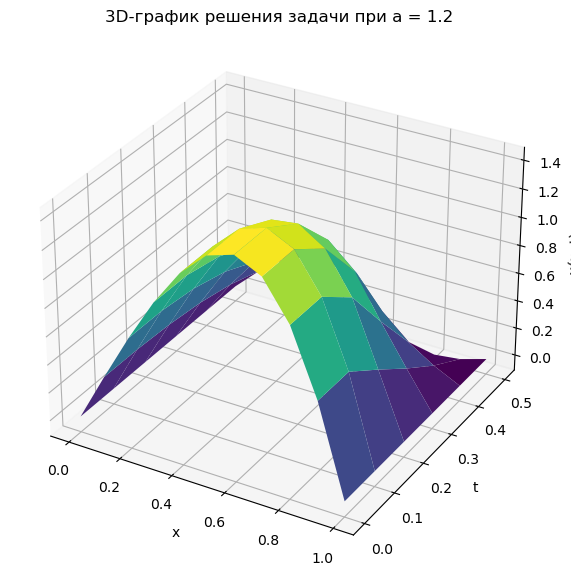

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Параметры задачи
a = 1.2  # Параметр a, можно изменить
h = 0.1  # Шаг по x и t
s = 1.0  # Длина области по x
t_max = 0.5  # Время моделирования
N_x = int(s / h) + 1  # Количество узлов по x
N_t = int(t_max / h) + 1  # Количество временных слоев
x = np.linspace(0, s, N_x)
t = np.linspace(0, t_max, N_t)
X, T = np.meshgrid(x, t)

# Функции начальных условий
def f(x):
    return (a * x**2 + 1.1) * np.sin(np.pi * x)

def phi(x):
    return 0  # Дано, что Ф(x) = 0

# Инициализация массива решения
u = np.zeros((N_x, N_t))

# Начальные условия
u[:, 0] = f(x)  # u(x, 0) = f(x)

# Вычисление u_i1 с использованием разностного отношения для производной
for i in range(1, N_x - 1):
    u[i, 1] = u[i, 0] + h * phi(x[i])  # По формуле u_i1 = u_i0 + h * phi(x_i)
    
# Заполнение остального массива по разностной схеме
for j in range(1, N_t - 1):
    for i in range(1, N_x - 1):
        u[i, j+1] = u[i+1, j] + u[i-1, j] - u[i, j-1]  # Аппроксимация уравнения

# Построение 3D-графика
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis')

# Настройки графика
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
ax.set_title(f"3D-график решения задачи при a = {a}")

plt.show()